In [1]:
run config

In [2]:
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks
import os
from tqdm import tqdm

In [3]:
def crop_center(img):
    
    width, height = img.size   
    new_width  = 2048
    new_height = 2048

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    img = img.crop((left, top, right, bottom))
    
    return img

def patching(img):
    
    # size of blocks
    H = 256
    W = 256
    block_shape = (H, W, 3)

    view = view_as_blocks(img, block_shape)
    img = view.reshape(-1, H, W, 3)
    
    return img


In [4]:
folders_train=[]
folders_val=[]

for i in os.listdir(original_path):
    if i[-1]=='N':
        if (i[7]=='6') or (i[7]=='9'):
            folders_val.append(i)
        else:
            folders_train.append(i)

In [5]:
noisy_train=[]
clean_train=[]
noisy_val=[]
clean_val=[]

#train
for i in tqdm(range(len(folders_train))):
    img = Image.open(original_path+folders_train[i]+'/NOISY_SRGB_010.PNG')
    img = np.array(crop_center(img))
    img = patching(img)
    noisy_train.append(img)
    
    img = Image.open(original_path+folders_train[i]+'/GT_SRGB_010.PNG')
    img = np.array(crop_center(img))
    img = patching(img)
    clean_train.append(img)
    
#validate
for i in tqdm(range(len(folders_val))):
    img = Image.open(original_path+folders_val[i]+'/NOISY_SRGB_010.PNG')
    img = np.array(crop_center(img))
    img = patching(img)
    noisy_val.append(img)
    
    img = Image.open(original_path+folders_val[i]+'/GT_SRGB_010.PNG')
    img = np.array(crop_center(img))
    img = patching(img)
    clean_val.append(img)    
    

100%|██████████| 11/11 [00:08<00:00,  1.35it/s]


In [6]:
#train
k=0
for i in tqdm(range(len(noisy_train))):
    for j in range(len(noisy_train[i])):
        
        img = np.float32(noisy_train[i][j]/np.max(noisy_train[i][j]))
        img = torch.FloatTensor(img).permute(2,0,1)
        torch.save(img, data_path + 'noisy_train/' + '{0:04}'.format(k))
        
        img = np.float32(clean_train[i][j]/np.max(clean_train[i][j]))
        img = torch.FloatTensor(img).permute(2,0,1)
        torch.save(img, data_path + 'clean_train/' + '{0:04}'.format(k))
        
        k+=1
        
#validate
k=0
for i in tqdm(range(len(noisy_val))):
    for j in range(len(noisy_val[i])):
        
        img = np.float32(noisy_val[i][j]/np.max(noisy_val[i][j]))
        img = torch.FloatTensor(img).permute(2,0,1)
        torch.save(img, data_path + 'noisy_val/' + '{0:04}'.format(k))
        
        img = np.float32(clean_val[i][j]/np.max(clean_val[i][j]))
        img = torch.FloatTensor(img).permute(2,0,1)
        torch.save(img, data_path + 'clean_val/' + '{0:04}'.format(k))
        
        k+=1        

100%|██████████| 11/11 [00:01<00:00,  6.79it/s]


<Figure size 432x288 with 0 Axes>

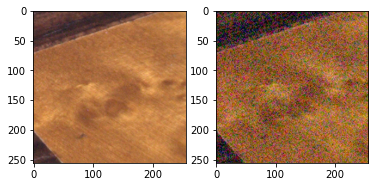

In [19]:
i='0045'

a=torch.load(data_path+'clean_train/'+str(i))
b=torch.load(data_path+'noisy_train/'+str(i))

plt.figure()
f, fig = plt.subplots(1,2) 
fig[0].imshow(a.permute(1,2,0))
fig[1].imshow(b.permute(1,2,0))

#plt.imshow(a)
#plt.imshow(b)